### Data standardization & Normalization

독립 변수들이 서로 단위가 다르거나 편차가 심할 때 값의 스케일을 일정한 수준으로 변환시켜주는 표준화(Standardization)와 정규화(Normalization) 스케일링을 한다.

표준화(Standardization)는 각 관측치의 값이 전체 평균을 기준으로 어느 정도 떨어져 있는지 타날 때 사용한다. Zero-mean으로부터 얼마나 떨어져 있는지를 나타내기 때문에 이를 Z-score라 표현한다. 서로 다른 변수 간 값의 크기를 직관적으로 비교할 수 있다.  
$$z=\frac{x-\mu}{\sigma}$$
정규화(Normalization)는 데이터의 범위를 0부터 1가지로 변환하여 데이터 분포를 조정하는 방법이다. 전체 데이터 중에서 해당 값이 어떤 위치에 있는지 파악하는 데 유용하다.  
$$x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

기본 표준화, 정규화 방식은 outlier에 민감하다는 단점이 있어, 이를 보완한 scaling 기법인 RobustScaler도 많이 쓰인다.  
표준화나 정규화는 k-Nearest Neighbor, SVM과 같은 거리를 활용한 cluster 분석에서 필수적이다. 군집을 나누는데 변수마다 스케일이 제각각이면 군집이 제대로 분리될 수 없기 때문이다.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
# https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
df = pd.read_csv("../input/wine-dataset-for-clustering/wine-clustering.csv")

In [12]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# 기존 데이터 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df.mean())
print('\n')
# 각 컬럼의 분산값
print(df.var())

Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64


Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64


*Magnesium과 Proline의 분산이 큰 것을 확인*

In [14]:
# 전체 컬럼 표준화

# 데이터 표준화 적용
StandardScaler = StandardScaler()
df_stand = StandardScaler.fit_transform(df)



In [15]:
df_stand

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
# 컬럼명 결합
df_stand = pd.DataFrame(data=df_stand, columns=df.columns)

df_stand.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [17]:
# 데이터 표준화 스케일링 후 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df_stand.mean())
print('\n')
# 각 컬럼의 분산값
print(df_stand.var())

Alcohol                -8.382808e-16
Malic_Acid             -1.197544e-16
Ash                    -8.370333e-16
Ash_Alcanity           -3.991813e-17
Magnesium              -3.991813e-17
Total_Phenols           0.000000e+00
Flavanoids             -3.991813e-16
Nonflavanoid_Phenols    3.592632e-16
Proanthocyanins        -1.197544e-16
Color_Intensity         2.494883e-17
Hue                     1.995907e-16
OD280                   3.193450e-16
Proline                -1.596725e-16
dtype: float64


Alcohol                 1.00565
Malic_Acid              1.00565
Ash                     1.00565
Ash_Alcanity            1.00565
Magnesium               1.00565
Total_Phenols           1.00565
Flavanoids              1.00565
Nonflavanoid_Phenols    1.00565
Proanthocyanins         1.00565
Color_Intensity         1.00565
Hue                     1.00565
OD280                   1.00565
Proline                 1.00565
dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


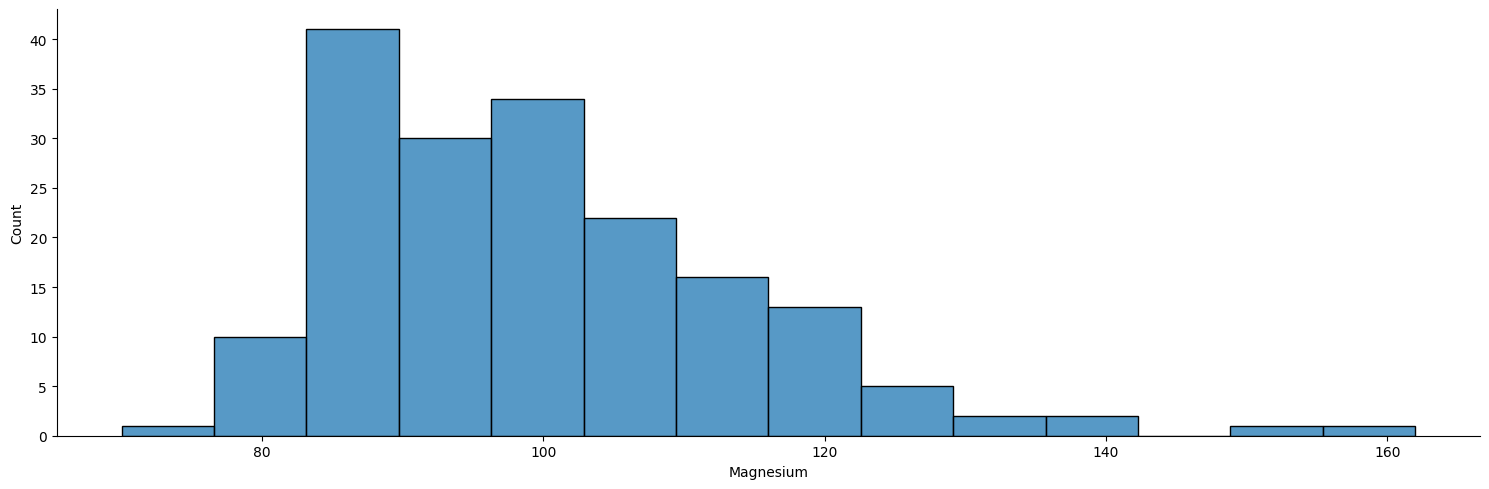

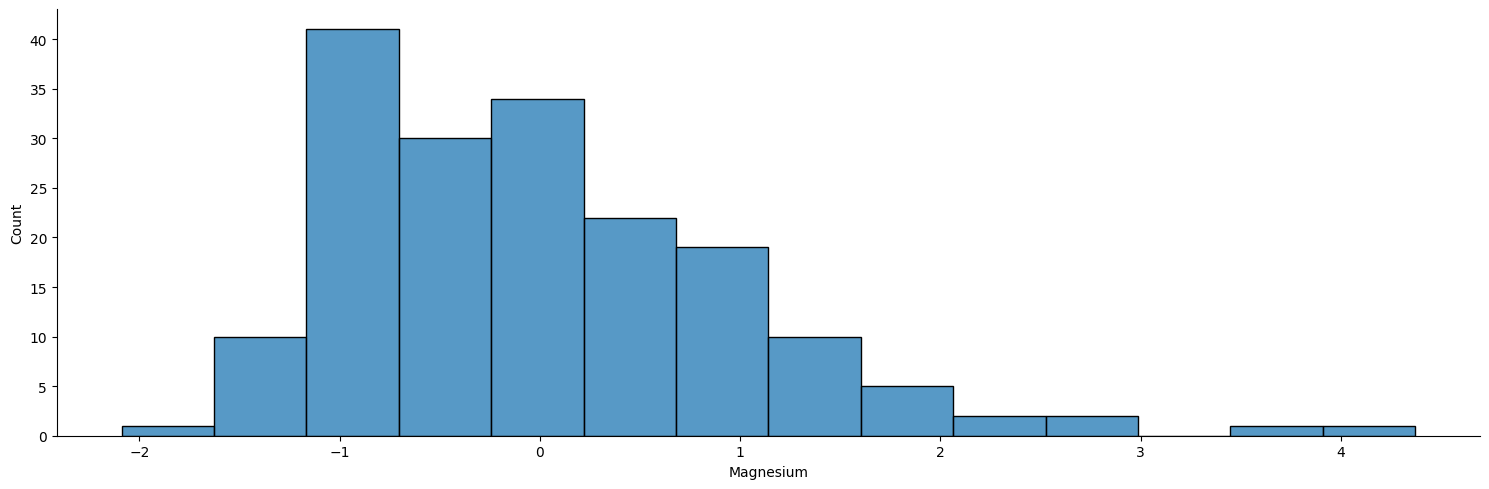

In [18]:
# Magnesium 컬럼 표준화 스케일링 전과 후 분포 비교

%matplotlib inline
sns.displot(df['Magnesium'],height = 5, aspect = 3)
sns.displot(df_stand['Magnesium'],height = 5, aspect = 3)

plt.show()

In [19]:
# 전체 컬럼 정규화

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df.columns)

df_minmax.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [20]:
# 정규화 적용 컬럼 최솟값, 최댓값 확인

print(df_minmax.min()) #최솟값 
print('\n')
print(df_minmax.max()) #최댓값 

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64


Alcohol                 1.0
Malic_Acid              1.0
Ash                     1.0
Ash_Alcanity            1.0
Magnesium               1.0
Total_Phenols           1.0
Flavanoids              1.0
Nonflavanoid_Phenols    1.0
Proanthocyanins         1.0
Color_Intensity         1.0
Hue                     1.0
OD280                   1.0
Proline                 1.0
dtype: float64


In [21]:
# 데이터 정규화 스케일링 후 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df_minmax.mean())
print('\n')
# 각 컬럼의 분산값
print(df_minmax.var())

Alcohol                 0.518584
Malic_Acid              0.315484
Ash                     0.538244
Ash_Alcanity            0.458502
Magnesium               0.323278
Total_Phenols           0.453487
Flavanoids              0.356386
Nonflavanoid_Phenols    0.437460
Proanthocyanins         0.372523
Color_Intensity         0.322363
Hue                     0.388170
OD280                   0.491460
Proline                 0.334446
dtype: float64


Alcohol                 0.045641
Malic_Acid              0.048744
Ash                     0.021523
Ash_Alcanity            0.029633
Magnesium               0.024101
Total_Phenols           0.046574
Flavanoids              0.044407
Nonflavanoid_Phenols    0.055139
Proanthocyanins         0.032600
Color_Intensity         0.039127
Hue                     0.034533
OD280                   0.067636
Proline                 0.050451
dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


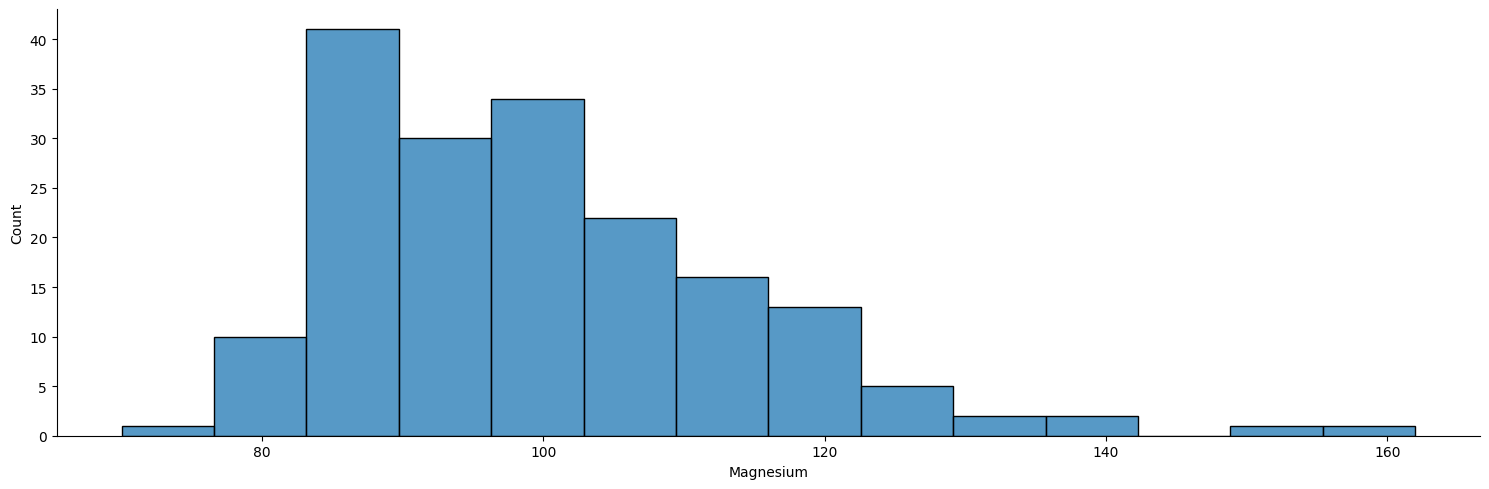

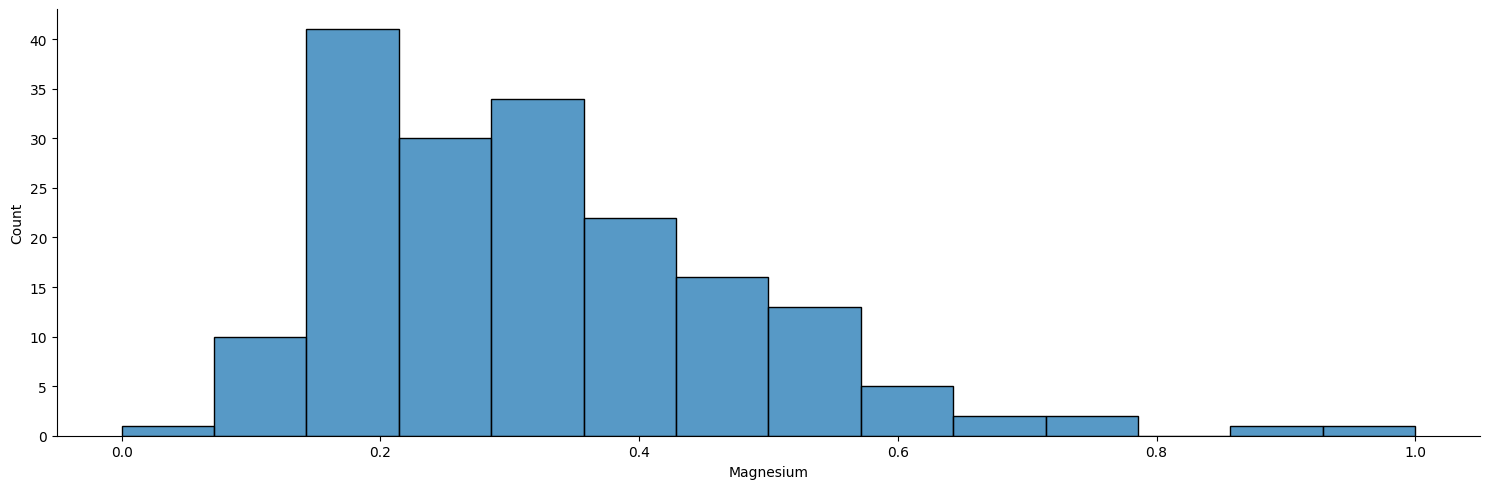

In [22]:
# Magnesium 컬럼 정규화 스케일링 전과 후 분포 비교

%matplotlib inline
sns.displot(df['Magnesium'],height = 5, aspect = 3)
sns.displot(df_minmax['Magnesium'],height = 5, aspect = 3)

plt.show()

In [23]:
# 전체 컬럼 RobustScaler

# 데이터 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df)

# 컬럼명 결합
df_robust = pd.DataFrame(data=df_robust, columns=df.columns)

df_robust.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935


In [25]:
# 데이터 RobustScaler 적용 후 컬럼 별 평균, 분산 확인

# 각 컬럼의 평균값
print(df_robust.mean())
print('\n')
# 각 컬럼의 분산값
print(df_robust.var())

Alcohol                -0.037553
Malic_Acid              0.318479
Ash                     0.018754
Ash_Alcanity           -0.001176
Magnesium               0.091662
Total_Phenols          -0.056631
Flavanoids             -0.063312
Nonflavanoid_Phenols    0.130471
Proanthocyanins         0.051284
Color_Intensity         0.123520
Hue                    -0.022372
OD280                  -0.136564
Proline                 0.151482
dtype: float64


Alcohol                 0.381132
Malic_Acid              0.569766
Ash                     0.623277
Ash_Alcanity            0.603174
Magnesium               0.565067
Total_Phenols           0.350252
Flavanoids              0.357746
Nonflavanoid_Phenols    0.552056
Proanthocyanins         0.668561
Color_Intensity         0.605204
Hue                     0.458666
OD280                   0.331842
Proline                 0.422453
dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


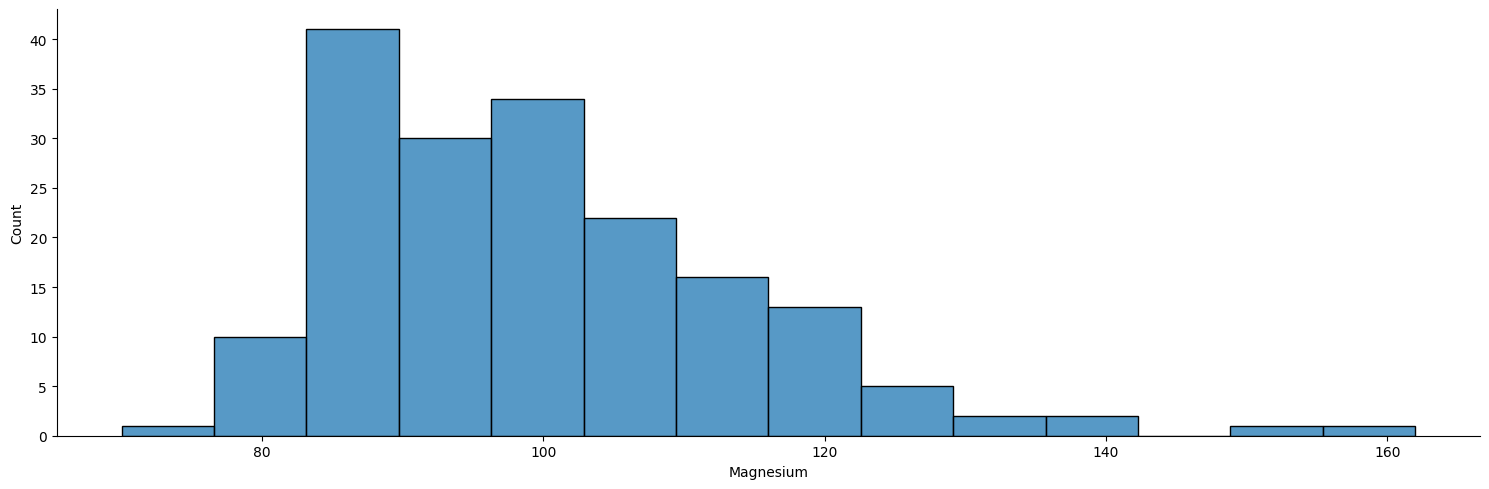

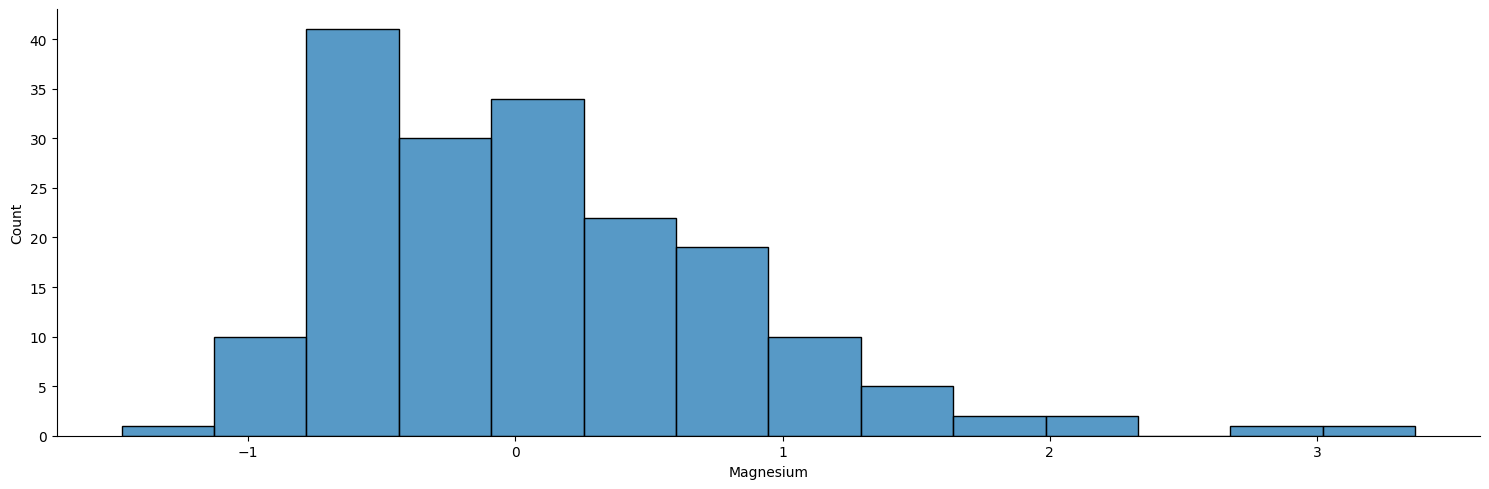

In [26]:
# Magnesium 컬럼 RobustScaler 적용 전과 후 분포 비교

%matplotlib inline
sns.displot(df['Magnesium'],height = 5, aspect = 3)
sns.displot(df_robust['Magnesium'],height = 5, aspect = 3)

plt.show()